<a href="https://colab.research.google.com/github/20104047TranThiMyNgoc/AI-Subject/blob/main/Tu%E1%BA%A7n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 25.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=40b00a2d83135a02e5ce840566be02b093b845385e8f20de46429956ea107c78
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x= np.arange(11)
mfx= fuzz.trimf(x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

14.0


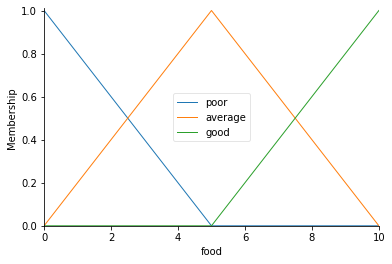

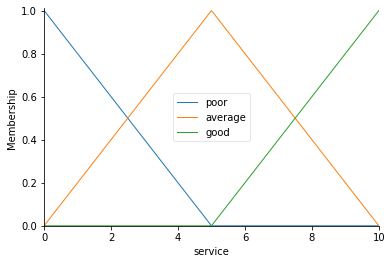

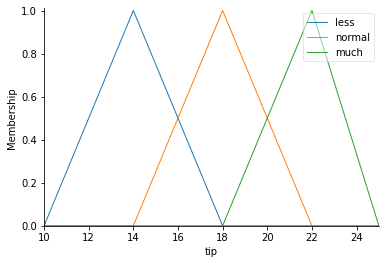

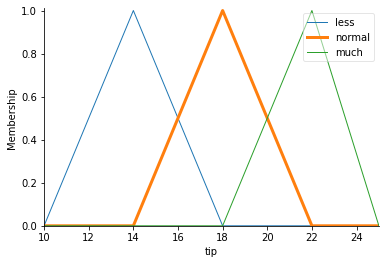

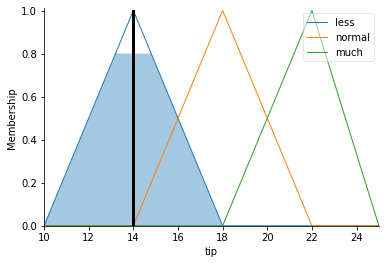

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
'''Antecedent: đầu vào
Consequent: ouput(kết quả)'''
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['normal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
food.view()
service.view()
tip.view()
tip['normal'].view()
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6, rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 0
tipping.input['service'] = 1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

18.333333333333325


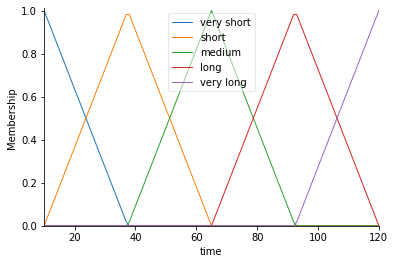

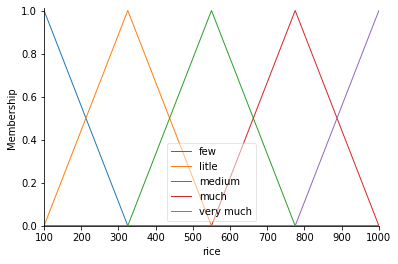

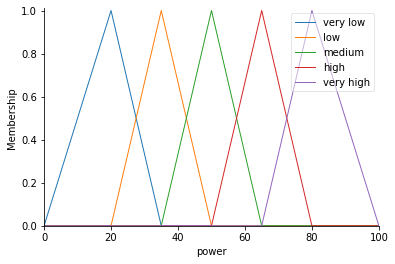

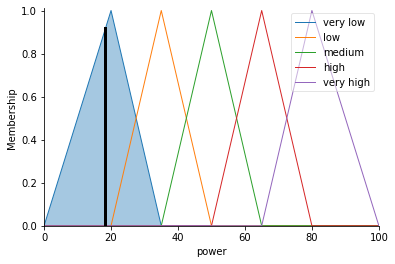

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')
time['very short'] = fuzz.trimf(time.universe,[10,10,37.5])
time['short'] = fuzz.trimf(time.universe,[10,37.5,65])
time['medium'] = fuzz.trimf(time.universe,[37.5,65,92.5])
time['long'] = fuzz.trimf(time.universe,[65,92.5,120])
time['very long'] = fuzz.trimf(time.universe,[92.5,120,120])
rice['few'] = fuzz.trimf(rice.universe,[100,100,325])
rice['litle'] = fuzz.trimf(rice.universe,[100,325,550])
rice['medium'] = fuzz.trimf(rice.universe,[325,550,775])
rice['much'] = fuzz.trimf(rice.universe,[550,775,1000])
rice['very much'] = fuzz.trimf(rice.universe,[775,1000,1000])
power['very low'] = fuzz.trimf(power.universe,[0,20,35])
power['low'] = fuzz.trimf(power.universe,[20,35,50])
power['medium'] = fuzz.trimf(power.universe,[35,50,65])
power['high'] = fuzz.trimf(power.universe,[50,65,80])
power['very high'] = fuzz.trimf(power.universe,[65,80,100])
time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very short']&rice['few'],power['very low'])
rule2 = ctrl.Rule(time['very short']&rice['litle'],power['low'])
rule3 = ctrl.Rule(time['very short']&rice['medium'],power['medium'])
rule4 = ctrl.Rule(time['very short']&rice['much'],power['high'])
rule5 = ctrl.Rule(time['very short']&rice['very much'],power['very high'])
rule6 = ctrl.Rule(time['short']&rice['few'],power['low'])
rule7 = ctrl.Rule(time['short']&rice['litle'],power['low'])
rule8 = ctrl.Rule(time['short']&rice['medium'],power['medium'])
rule9 = ctrl.Rule(time['short']&rice['much'],power['high'])
rule10 = ctrl.Rule(time['short']&rice['very much'],power['high'])
rule11 = ctrl.Rule(time['medium']&rice['few'],power['medium'])
rule12 = ctrl.Rule(time['medium']&rice['litle'],power['medium'])
rule13 = ctrl.Rule(time['medium']&rice['medium'],power['medium'])
rule14 = ctrl.Rule(time['medium']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['medium']&rice['very much'],power['high'])
rule16 = ctrl.Rule(time['long']&rice['few'],power['low'])
rule17 = ctrl.Rule(time['long']&rice['litle'],power['medium'])
rule18 = ctrl.Rule(time['long']&rice['medium'],power['high'])
rule19 = ctrl.Rule(time['long']&rice['much'],power['high'])
rule20 = ctrl.Rule(time['long']&rice['very much'],power['very high'])
rule21 = ctrl.Rule(time['very long']&rice['few'],power['very low'])
rule22 = ctrl.Rule(time['very long']&rice['litle'],power['low'])
rule23 = ctrl.Rule(time['very long']&rice['medium'],power['high'])
rule24 = ctrl.Rule(time['very long']&rice['much'],power['very high'])
rule25 = ctrl.Rule(time['very long']&rice['very much'],power['very high'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                    rule8,rule9,rule10,rule11,rule12,rule13,rule14,
                                    rule15,rule16,rule17,rule18,rule19,rule20,rule21,
                                    rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice'] = 100
powering.input['time'] = 10
powering.compute()
print(powering.output['power'])
power.view(sim = powering)


31.034482758620694


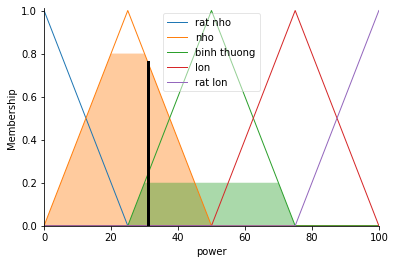

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,5),'time')
rice = ctrl.Antecedent(np.arange(100,1001,5),'rice')
power = ctrl.Consequent(np.arange(0,101,5),'power')
time['it nhanh']=fuzz.trimf(time.universe,[10,10,40])
time['nhanh']=fuzz.trimf(time.universe,[10,40,70])
time['binh thuong']=fuzz.trimf(time.universe,[40,70,95])
time['thap']=fuzz.trimf(time.universe,[70,95,120])
time['rat thap']=fuzz.trimf(time.universe,[95,120,120])
rice['rat it']=fuzz.trimf(rice.universe,[100,100,325])
rice['it']=fuzz.trimf(rice.universe,[100,325,550])
rice['binh thuong']=fuzz.trimf(rice.universe,[325,550,775])
rice['nhieu']=fuzz.trimf(rice.universe,[550,775,1000])
rice['rat nhieu']=fuzz.trimf(rice.universe,[775,1000,1000])
power['rat nho']=fuzz.trimf(power.universe,[0,0,25])
power['nho']=fuzz.trimf(power.universe,[0,25,50])
power['binh thuong']=fuzz.trimf(power.universe,[25,50,75])
power['lon']=fuzz.trimf(power.universe,[50,75,100])
power['rat lon']=fuzz.trimf(power.universe,[75,100,100])

rule1 = ctrl.Rule(time['it nhanh']&rice['rat it'],power['rat nho'])
rule2 = ctrl.Rule(time['it nhanh']&rice['it'],power['rat nho'])
rule3 = ctrl.Rule(time['it nhanh']&rice['binh thuong'],power['rat nho'])
rule4 = ctrl.Rule(time['it nhanh']&rice['nhieu'],power['nho'])
rule5 = ctrl.Rule(time['it nhanh']&rice['rat nhieu'],power['binh thuong'])
rule6 = ctrl.Rule(time['nhanh']&rice['rat it'],power['rat nho'])
rule7 = ctrl.Rule(time['nhanh']&rice['it'],power['nho'])
rule8 = ctrl.Rule(time['nhanh']&rice['binh thuong'],power['nho'])
rule9 = ctrl.Rule(time['nhanh']&rice['nhieu'],power['binh thuong'])
rule10 = ctrl.Rule(time['nhanh']&rice['rat nhieu'],power['lon'])
rule11 = ctrl.Rule(time['binh thuong']&rice['rat it'],power['rat nho'])
rule12 = ctrl.Rule(time['binh thuong']&rice['it'],power['nho'])
rule13 = ctrl.Rule(time['binh thuong']&rice['binh thuong'],power['binh thuong'])
rule14 = ctrl.Rule(time['binh thuong']&rice['nhieu'],power['lon'])
rule15 = ctrl.Rule(time['binh thuong']&rice['rat nhieu'],power['rat lon'])
rule16 = ctrl.Rule(time['thap']&rice['rat it'],power['nho'])
rule17 = ctrl.Rule(time['thap']&rice['it'],power['binh thuong'])
rule18 = ctrl.Rule(time['thap']&rice['binh thuong'],power['lon'])
rule19 = ctrl.Rule(time['thap']&rice['nhieu'],power['lon'])
rule20 = ctrl.Rule(time['thap']&rice['rat nhieu'],power['rat lon'])
rule21 = ctrl.Rule(time['rat thap']&rice['rat it'],power['binh thuong'])
rule22 = ctrl.Rule(time['rat thap']&rice['it'],power['lon'])
rule23 = ctrl.Rule(time['rat thap']&rice['binh thuong'],power['rat lon'])
rule24 = ctrl.Rule(time['rat thap']&rice['nhieu'],power['rat lon'])
rule25 = ctrl.Rule(time['rat thap']&rice['rat nhieu'],power['rat lon'])
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6, rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16, rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 100
powering.input['rice'] = 100
powering.compute()
print(powering.output['power'])
power.view(sim=powering)